09.2
10/31

In [1]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

/Users/itgel98/opt/anaconda3/envs/SoftwareEngineering/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the datasets using Pandas
weather_data = pd.read_csv("weather_historic_data.csv")
station_data = pd.read_csv("station_historic_availability_data.csv")

In [3]:
weather_data.dtypes

Unnamed: 0       int64
time            object
temperature    float64
windspeed      float64
pressure       float64
description     object
cloudiness       int64
dtype: object

In [4]:
station_data

,Unnamed: 0,number,available_bikes,available_bike_stands,last_update
0,0,42,19,11,2023-03-03 21:36:02
1,1,30,9,11,2023-03-03 21:38:10
2,2,54,5,28,2023-03-03 21:37:09
3,3,108,12,23,2023-03-03 21:33:44
4,4,20,10,20,2023-03-03 21:33:42
...,...,...,...,...,...
1138409,1138409,39,4,16,2023-04-07 17:43:19
1138410,1138410,83,16,24,2023-04-07 17:39:32
1138411,1138411,92,28,12,2023-04-07 17:41:50
1138412,1138412,21,10,20,2023-04-07 17:43:07


In [5]:
weather_data

,Unnamed: 0,time,temperature,windspeed,pressure,description,cloudiness
0,0,2023-03-03 21:38:52,5.20,2.06,1033.0,light intensity drizzle,75
1,1,2023-03-03 22:10:54,4.78,2.06,1033.0,broken clouds,75
2,2,2023-03-03 22:32:40,4.93,3.60,1033.0,broken clouds,75
3,3,2023-03-03 23:07:44,4.98,3.60,1033.0,broken clouds,75
4,4,2023-03-03 23:37:27,5.14,2.68,1033.0,broken clouds,75
...,...,...,...,...,...,...,...
1668,1668,2023-04-07 15:38:06,9.99,5.36,1020.0,broken clouds,75
1669,1669,2023-04-07 16:08:09,9.99,5.14,1020.0,broken clouds,75
1670,1670,2023-04-07 16:44:11,9.99,5.14,1019.0,broken clouds,75
1671,1671,2023-04-07 17:07:30,9.99,5.14,1020.0,broken clouds,75


In [6]:
weather_data = weather_data.drop(columns=['Unnamed: 0'])
station_data = station_data.drop(columns=['Unnamed: 0'])

In [7]:
# Preprocess the data
weather_data['time'] = pd.to_datetime(weather_data['time'])
station_data['last_update'] = pd.to_datetime(station_data['last_update'])

In [8]:
# Extract day and hour
weather_data['year'] = weather_data['time'].dt.year
weather_data['month'] = weather_data['time'].dt.month
weather_data['day'] = weather_data['time'].dt.day
weather_data['hour'] = weather_data['time'].dt.hour
weather_data['minute'] = weather_data['time'].dt.minute
weather_data['is_weekday'] = ((weather_data['time'].dt.weekday >= 0) & (weather_data['time'].dt.weekday <= 4)).astype(int)


station_data['year'] = station_data['last_update'].dt.year
station_data['month'] = station_data['last_update'].dt.month
station_data['day'] = station_data['last_update'].dt.day
station_data['hour'] = station_data['last_update'].dt.hour
station_data['minute'] = station_data['last_update'].dt.minute

In [9]:
weather_data

,time,temperature,windspeed,pressure,description,cloudiness,year,month,day,hour,minute,is_weekday
0,2023-03-03 21:38:52,5.20,2.06,1033.0,light intensity drizzle,75,2023,3,3,21,38,1
1,2023-03-03 22:10:54,4.78,2.06,1033.0,broken clouds,75,2023,3,3,22,10,1
2,2023-03-03 22:32:40,4.93,3.60,1033.0,broken clouds,75,2023,3,3,22,32,1
3,2023-03-03 23:07:44,4.98,3.60,1033.0,broken clouds,75,2023,3,3,23,7,1
4,2023-03-03 23:37:27,5.14,2.68,1033.0,broken clouds,75,2023,3,3,23,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1668,2023-04-07 15:38:06,9.99,5.36,1020.0,broken clouds,75,2023,4,7,15,38,1
1669,2023-04-07 16:08:09,9.99,5.14,1020.0,broken clouds,75,2023,4,7,16,8,1
1670,2023-04-07 16:44:11,9.99,5.14,1019.0,broken clouds,75,2023,4,7,16,44,1
1671,2023-04-07 17:07:30,9.99,5.14,1020.0,broken clouds,75,2023,4,7,17,7,1


In [10]:
# One-hot encode the 'description' column
weather_data = pd.get_dummies(weather_data, columns= ['description'])

In [11]:
weather_data

,time,temperature,windspeed,pressure,cloudiness,year,month,day,hour,minute,...,description_light intensity shower rain,description_light rain,description_light snow,description_mist,description_moderate rain,description_overcast clouds,description_scattered clouds,description_shower rain,description_sleet,description_snow
0,2023-03-03 21:38:52,5.20,2.06,1033.0,75,2023,3,3,21,38,...,0,0,0,0,0,0,0,0,0,0
1,2023-03-03 22:10:54,4.78,2.06,1033.0,75,2023,3,3,22,10,...,0,0,0,0,0,0,0,0,0,0
2,2023-03-03 22:32:40,4.93,3.60,1033.0,75,2023,3,3,22,32,...,0,0,0,0,0,0,0,0,0,0
3,2023-03-03 23:07:44,4.98,3.60,1033.0,75,2023,3,3,23,7,...,0,0,0,0,0,0,0,0,0,0
4,2023-03-03 23:37:27,5.14,2.68,1033.0,75,2023,3,3,23,37,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,2023-04-07 15:38:06,9.99,5.36,1020.0,75,2023,4,7,15,38,...,0,0,0,0,0,0,0,0,0,0
1669,2023-04-07 16:08:09,9.99,5.14,1020.0,75,2023,4,7,16,8,...,0,0,0,0,0,0,0,0,0,0
1670,2023-04-07 16:44:11,9.99,5.14,1019.0,75,2023,4,7,16,44,...,0,0,0,0,0,0,0,0,0,0
1671,2023-04-07 17:07:30,9.99,5.14,1020.0,75,2023,4,7,17,7,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Merge the datasets
merged_data = pd.merge(station_data, weather_data, on = ['year','month','day','hour'])

In [13]:
# Drop every redundent columns
merged_data = merged_data.drop(columns=['last_update', 'time'])

In [14]:
merged_data.head(10)

,number,available_bikes,available_bike_stands,year,month,day,hour,minute_x,temperature,windspeed,...,description_light intensity shower rain,description_light rain,description_light snow,description_mist,description_moderate rain,description_overcast clouds,description_scattered clouds,description_shower rain,description_sleet,description_snow
0,42,19,11,2023,3,3,21,36,5.2,2.06,...,0,0,0,0,0,0,0,0,0,0
1,30,9,11,2023,3,3,21,38,5.2,2.06,...,0,0,0,0,0,0,0,0,0,0
2,54,5,28,2023,3,3,21,37,5.2,2.06,...,0,0,0,0,0,0,0,0,0,0
3,108,12,23,2023,3,3,21,33,5.2,2.06,...,0,0,0,0,0,0,0,0,0,0
4,20,10,20,2023,3,3,21,33,5.2,2.06,...,0,0,0,0,0,0,0,0,0,0
5,56,7,33,2023,3,3,21,33,5.2,2.06,...,0,0,0,0,0,0,0,0,0,0
6,6,4,16,2023,3,3,21,36,5.2,2.06,...,0,0,0,0,0,0,0,0,0,0
7,18,15,15,2023,3,3,21,36,5.2,2.06,...,0,0,0,0,0,0,0,0,0,0
8,32,5,25,2023,3,3,21,34,5.2,2.06,...,0,0,0,0,0,0,0,0,0,0
9,52,2,30,2023,3,3,21,36,5.2,2.06,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Engineer is_busy_hours feature
merged_data['is_busy_hours'] = ((merged_data['hour'] >= 7) & (merged_data['hour'] <= 10)) | ((merged_data['hour'] >= 16) & (merged_data['hour'] <= 19)).astype(int)

In [16]:
merged_data['cold_weather'] = (merged_data['temperature'] < 5).astype(float)
merged_data['windy_weather'] = (merged_data['windspeed'] > 8).astype(float)

In [17]:
unique_stations = list(merged_data['number'].unique())
unique_stations.sort()

In [18]:
for station_id in unique_stations:
    station_data = merged_data[merged_data['number'] == station_id]
    
    # Split the data into training and testing sets
    X = station_data.drop(columns=['available_bikes', 'available_bike_stands'])
    y = station_data[['available_bikes', 'available_bike_stands']]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a machine learning model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Serialize the trained model into a file called model.pkl
    with open(f'model_{station_id}.pkl', 'wb') as handle:
        pickle.dump(model, handle, pickle.HIGHEST_PROTOCOL)

    # Deserialize the model.pkl file into an object called model
    with open(f'model_{station_id}.pkl', 'rb') as handle:
        model = pickle.load(handle)

    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error for station {station_id}:", mse)

Mean Squared Error for station 1: 64.91890832706295
Mean Squared Error for station 2: 15.698483087189636
Mean Squared Error for station 3: 19.364686649226087
Mean Squared Error for station 4: 32.251376908922836
Mean Squared Error for station 5: 166.82057040640566
Mean Squared Error for station 6: 25.244593710286154
Mean Squared Error for station 7: 37.93773087157708
Mean Squared Error for station 8: 54.27246751658174
Mean Squared Error for station 9: 42.37901418992082
Mean Squared Error for station 10: 19.81822246920527
Mean Squared Error for station 11: 43.90750353841041
Mean Squared Error for station 12: 17.557777446277804
Mean Squared Error for station 13: 31.124008495233504
Mean Squared Error for station 14: 52.22726206638547
Mean Squared Error for station 15: 7.095817266384232
Mean Squared Error for station 16: 26.56084476574254
Mean Squared Error for station 17: 17.416240774081487
Mean Squared Error for station 18: 39.222074544627276
Mean Squared Error for station 19: 80.56325670

In [19]:
print(X.columns)

Index(['number', 'year', 'month', 'day', 'hour', 'minute_x', 'temperature',
       'windspeed', 'pressure', 'cloudiness', 'minute_y', 'is_weekday',
       'description_broken clouds', 'description_clear sky',
       'description_few clouds', 'description_fog',
       'description_heavy intensity rain',
       'description_light intensity drizzle',
       'description_light intensity drizzle rain',
       'description_light intensity shower rain', 'description_light rain',
       'description_light snow', 'description_mist',
       'description_moderate rain', 'description_overcast clouds',
       'description_scattered clouds', 'description_shower rain',
       'description_sleet', 'description_snow', 'is_busy_hours',
       'cold_weather', 'windy_weather'],
      dtype='object')


In [20]:
A = ['number', 'year', 'month', 'day', 'hour', 'minute_x', 'temperature',
       'windspeed', 'pressure', 'cloudiness', 'minute_y', 'is_weekday',
       'description_broken clouds', 'description_clear sky',
       'description_few clouds', 'description_fog',
       'description_heavy intensity rain',
       'description_light intensity drizzle',
       'description_light intensity drizzle rain',
       'description_light intensity shower rain', 'description_light rain',
       'description_light snow', 'description_mist',
       'description_moderate rain', 'description_overcast clouds',
       'description_scattered clouds', 'description_shower rain',
       'description_sleet', 'description_snow', 'is_busy_hours',
       'cold_weather', 'windy_weather']


In [21]:
A = pd.DataFrame(columns = A)
A

,number,year,month,day,hour,minute_x,temperature,windspeed,pressure,cloudiness,...,description_mist,description_moderate rain,description_overcast clouds,description_scattered clouds,description_shower rain,description_sleet,description_snow,is_busy_hours,cold_weather,windy_weather


In [22]:
X

,number,year,month,day,hour,minute_x,temperature,windspeed,pressure,cloudiness,...,description_mist,description_moderate rain,description_overcast clouds,description_scattered clouds,description_shower rain,description_sleet,description_snow,is_busy_hours,cold_weather,windy_weather
58,117,2023,3,3,21,39,5.20,2.06,1033.0,75,...,0,0,0,0,0,0,0,False,0.0,0.0
172,117,2023,3,3,21,39,5.20,2.06,1033.0,75,...,0,0,0,0,0,0,0,False,0.0,0.0
286,117,2023,3,3,21,50,5.20,2.06,1033.0,75,...,0,0,0,0,0,0,0,False,0.0,0.0
400,117,2023,3,3,21,50,5.20,2.06,1033.0,75,...,0,0,0,0,0,0,0,False,0.0,0.0
609,117,2023,3,3,22,0,4.78,2.06,1033.0,75,...,0,0,0,0,0,0,0,False,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271741,117,2023,4,7,17,28,9.99,6.17,1020.0,75,...,0,0,0,0,0,0,0,True,0.0,0.0
2271968,117,2023,4,7,17,38,9.99,5.14,1020.0,75,...,0,0,0,0,0,0,0,True,0.0,0.0
2271969,117,2023,4,7,17,38,9.99,6.17,1020.0,75,...,0,0,0,0,0,0,0,True,0.0,0.0
2272196,117,2023,4,7,17,38,9.99,5.14,1020.0,75,...,0,0,0,0,0,0,0,True,0.0,0.0


This code is training a separate Linear Regression model for each bike station and predicting the number of available bikes (available_bikes) 
and available bike stands (available_bike_stands) for each station.
The predictions are made using the testing data (X_test), which contains information about the weather, time, and bike station details. After making predictions, the code calculates the mean squared error (MSE) for each station's model to evaluate its performance. The MSE is a measure of how well the model's predictions match the true values from the testing data.

In [23]:
import time
import datetime
import requests
import simplejson as json

def get_future_weather_data(day_from_today, hour):
    
    #get today's date
    today = datetime.date.today()
    date_time = datetime.datetime(today.year, today.month, today.day + day_from_today, hour)
    time_unix_timestamp = int(time.mktime(date_time.timetuple()))
    api_call = f"https://api.openweathermap.org/data/2.5/forecast?lat=53.35&lon=-6.26&appid=b7d6a55bc0fff59fb0d5f7c3c1668417&units=metric"
    forecast_info = requests.get(api_call)
    forecast_info_json = json.loads(forecast_info.text)
    #from the forecast, we need to find the time that is the closest to the time we input
    index = 0
    closest_date = abs(forecast_info_json.get('list')[0].get('dt') - time_unix_timestamp)
    for i in range(40):
        if abs(forecast_info_json.get('list')[i].get('dt') - time_unix_timestamp) < closest_date:
            closest_date = abs(forecast_info_json.get('list')[i].get('dt') - time_unix_timestamp)
            index = i
    weather_info = forecast_info_json.get('list')[index]
    
    weather_data = {}
    weather_data['temperature'] = weather_info.get('main').get('temp')
    weather_data['windspeed'] = weather_info.get('wind').get('speed')
    weather_data['pressure'] = weather_info.get('main').get('pressure')
    weather_data['cloudiness'] = weather_info.get('clouds').get('all')
    weather_data['description'] = weather_info.get('weather')[0].get('description')
    
    
#     # Convert the dictionary to a DataFrame
    future_weather_data = pd.DataFrame(weather_data, index=[0])
    
#     # One-hot encode the 'description' column
    future_weather_data = pd.get_dummies(future_weather_data, columns=['description'])
    
    return future_weather_data

In [24]:
get_future_weather_data(1,12)

,temperature,windspeed,pressure,cloudiness,description_overcast clouds
0,14.57,2.08,1027,100,1


In [25]:
def predict_for_future_date(station_id, days_from_today, hour):
    # Load the model
    with open(f'model_{station_id}.pkl', 'rb') as handle:
        model = pickle.load(handle)

    # Get future weather data
    future_weather_data = get_future_weather_data(days_from_today, hour)
    today_date = datetime.date.today()
    
    # Preprocess future_weather_data and make the prediction
    future_date = pd.to_datetime(today_date)
    day = future_date.day + days_from_today
    hour = hour
    year = future_date.year
    month = future_date.month
    is_weekday = int((future_date.weekday() >= 0) & (future_date.weekday() <= 4))
    is_busy_hours = int(((hour >= 7) & (hour <= 10)) | ((hour >= 16) & (hour <= 19)))
    cold_weather = (future_weather_data['temperature'][0] < 5).astype(float)
    windy_weather = (future_weather_data['windspeed'][0] > 8).astype(float)

    # Create input DataFrame
    input_df = future_weather_data.copy()
    input_df['year'] = year
    input_df['month'] = month
    input_df['day'] = day
    input_df['hour'] = hour
    input_df['number'] = station_id
    input_df['is_weekday'] = is_weekday
    input_df['is_busy_hours'] = is_busy_hours
    input_df['cold_weather'] = cold_weather
    input_df['windy_weather'] = windy_weather

    # Make sure the input DataFrame has the same columns as the training data
    for col in X.columns:
        if col not in input_df.columns:
            input_df[col] = 0

    # Reorder the columns to match the training data
    input_df = input_df[X.columns]

     # Make the prediction
    prediction = model.predict(input_df)

    available_bikes, available_bike_stands = prediction[0]

    # Ensure available_bikes is greater than 0
    available_bikes = max(0, available_bikes)

    # Ensure available_bike_stands is greater than 0 and less than or equal to 114
    available_bike_stands = max(0, min(available_bike_stands, 114))

    return int(available_bikes), int(available_bike_stands)

In [26]:
no_of_bikes_2 = []
station_number = 43
total_stands = 0
for i in range(24):
    data = predict_for_future_date(station_number, 1, i)
    no_of_bikes_2.append(data[0])
    total_stands = data[0] + data[1]

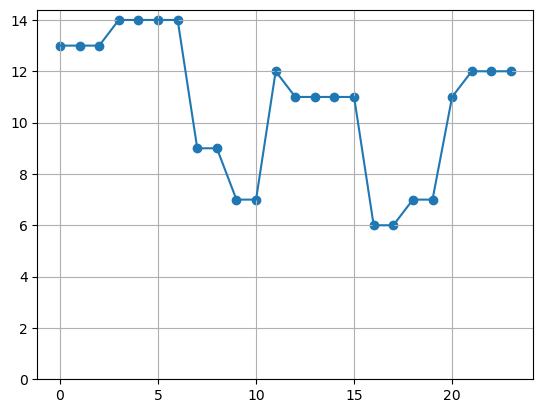

In [28]:
import matplotlib.pyplot as plt

x = range(24)


plt.plot(x, no_of_bikes_2)
plt.scatter(x, no_of_bikes_2)

plt.ylim(0)
plt.grid()